In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')  # nicer plots


In [2]:
output_folder = r"Airbnb_Charts"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print("Created folder for saving charts:", output_folder)
else:
    print("Folder exists:", output_folder)


Created folder for saving charts: Airbnb_Charts


In [3]:
file_path = r"Airbnb_Open_Data.xlsx"

if os.path.exists(file_path):
    df = pd.read_excel(file_path)
    print("File loaded successfully!")
    df.head()
else:
    print("File not found! Check the path:", os.path.abspath(file_path))


File loaded successfully!


In [4]:
# Strip spaces, lowercase, replace spaces with _
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns after cleaning:")
print(df.columns)


Columns after cleaning:
Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')


In [5]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])
df.isnull().sum()


Rows: 102599 Columns: 26


id                                     0
name                                 270
host_id                                0
host_identity_verified               289
host_name                            408
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [6]:
# drop duplicates
df = df.drop_duplicates()

# drop useless columns
for c in ['house_rules', 'license']:
    if c in df.columns:
        df = df.drop(c, axis=1)

# clean numeric columns
for c in ['price', 'service_fee']:
    if c in df.columns:
        df[c] = df[c].replace('[\$,]', '', regex=True).astype(float)

# rename columns for clarity
if 'price' in df.columns:
    df = df.rename(columns={'price':'price($)'})
if 'service_fee' in df.columns:
    df = df.rename(columns={'service_fee':'service_fee($)'})

# fix Brooklyn spelling
if 'neighbourhood_group' in df.columns:
    df['neighbourhood_group'] = df['neighbourhood_group'].replace({'Brookln':'Brooklyn','brookln':'Brooklyn'})

# drop missing values
df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  int64         
 1   name                            83390 non-null  object        
 2   host_id                         83390 non-null  int64         
 3   host_identity_verified          83390 non-null  object        
 4   host_name                       83390 non-null  object        
 5   neighbourhood_group             83390 non-null  object        
 6   neighbourhood                   83390 non-null  object        
 7   lat                             83390 non-null  float64       
 8   long                            83390 non-null  float64       
 9   country                         83390 non-null  object        
 10  country_code                    83390 non-null  object        
 11  instan

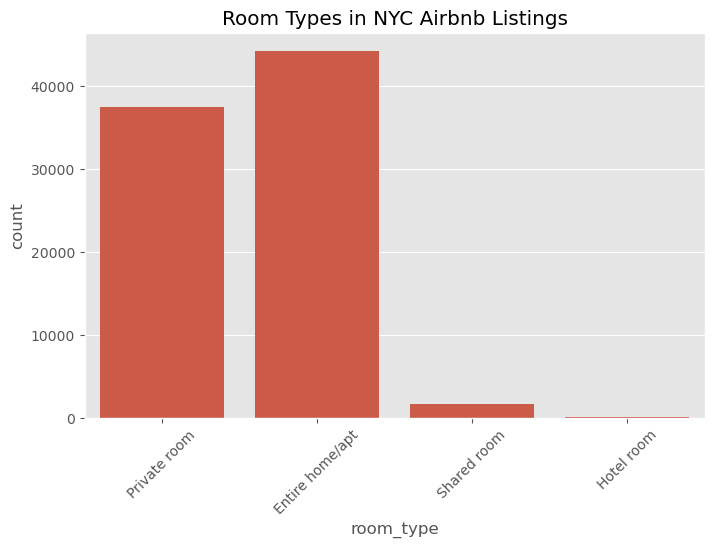

In [7]:
if 'room_type' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='room_type', data=df)
    plt.xticks(rotation=45)
    plt.title("Room Types in NYC Airbnb Listings")
    plt.savefig(os.path.join(output_folder, "room_type_count.png"))
    plt.show()


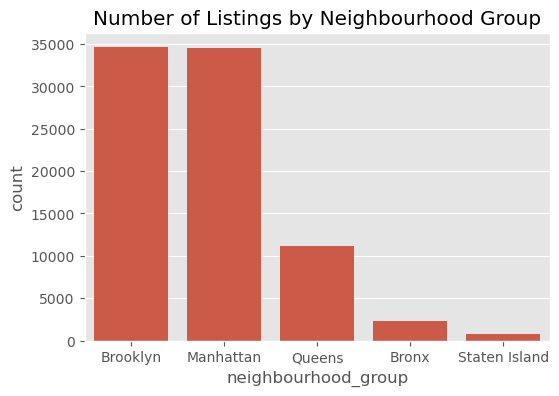

In [8]:
if 'neighbourhood_group' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='neighbourhood_group', data=df)
    plt.title("Number of Listings by Neighbourhood Group")
    plt.savefig(os.path.join(output_folder, "neighbourhood_group_count.png"))
    plt.show()


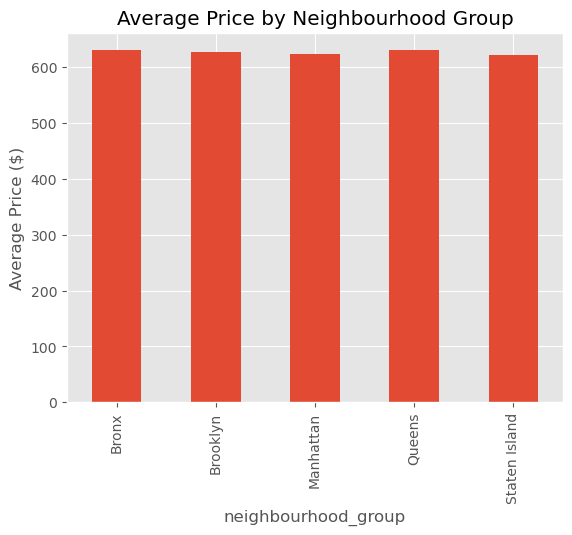

In [9]:
if 'neighbourhood_group' in df.columns and 'price($)' in df.columns:
    avg_price = df.groupby('neighbourhood_group')['price($)'].mean()
    avg_price.plot(kind='bar')
    plt.ylabel("Average Price ($)")
    plt.title("Average Price by Neighbourhood Group")
    plt.savefig(os.path.join(output_folder, "avg_price_by_neighbourhood.png"))
    plt.show()


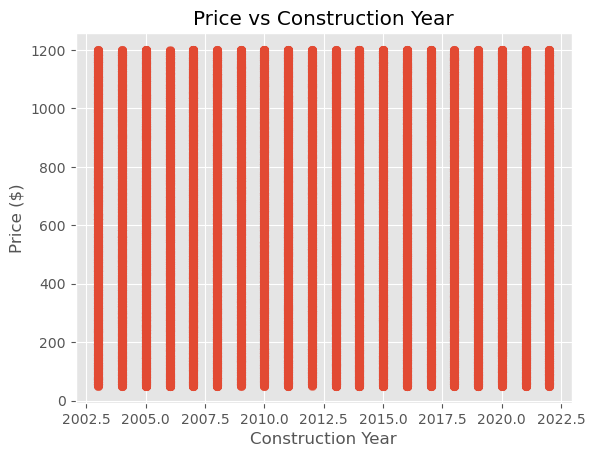

In [10]:
if 'construction_year' in df.columns and 'price($)' in df.columns:
    plt.scatter(df['construction_year'], df['price($)'], alpha=0.5)
    plt.xlabel("Construction Year")
    plt.ylabel("Price ($)")
    plt.title("Price vs Construction Year")
    plt.savefig(os.path.join(output_folder, "price_vs_year.png"))
    plt.show()


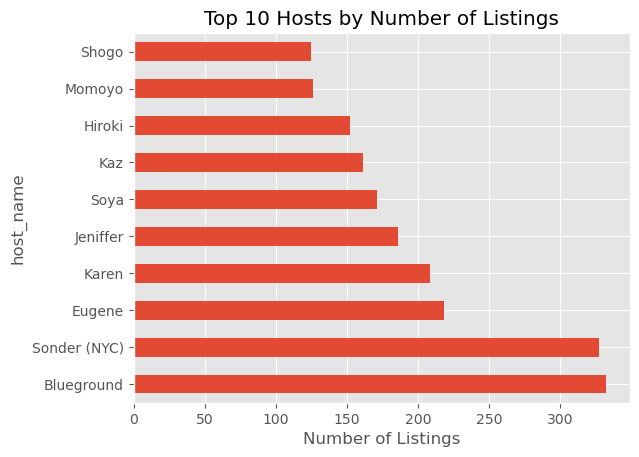

In [11]:
if 'host_name' in df.columns and 'calculated_host_listings_count' in df.columns:
    top_hosts = df.groupby('host_name')['calculated_host_listings_count'].max().sort_values(ascending=False).head(10)
    top_hosts.plot(kind='barh')
    plt.title("Top 10 Hosts by Number of Listings")
    plt.xlabel("Number of Listings")
    plt.savefig(os.path.join(output_folder, "top_10_hosts.png"))
    plt.show()


In [12]:
if 'host_identity_verified' in df.columns and 'review_scores_rating' in df.columns:
    if df['host_identity_verified'].notna().sum() > 0 and df['review_scores_rating'].notna().sum() > 0:
        avg_rating = df.groupby('host_identity_verified')['review_scores_rating'].mean()
        avg_rating.plot(kind='bar')
        plt.ylabel("Average Rating")
        plt.title("Verified vs Non-Verified Hosts - Avg Review Rating")
        plt.savefig(os.path.join(output_folder, "verified_host_rating.png"))
        plt.show()
    else:
        print("No valid data in host_identity_verified or review_scores_rating")


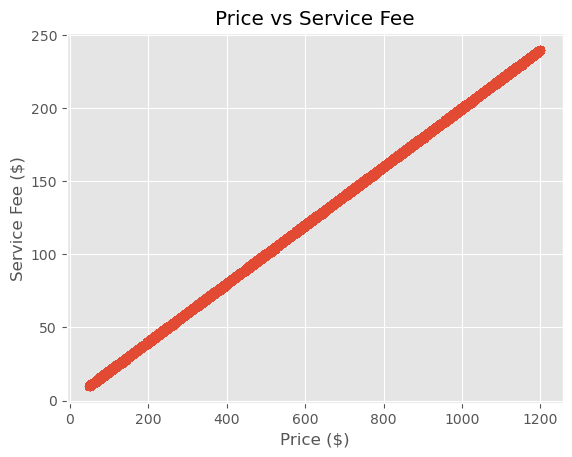

Correlation: 0.9999909085489921


In [13]:
if 'price($)' in df.columns and 'service_fee($)' in df.columns:
    plt.scatter(df['price($)'], df['service_fee($)'], alpha=0.5)
    plt.xlabel("Price ($)")
    plt.ylabel("Service Fee ($)")
    plt.title("Price vs Service Fee")
    plt.savefig(os.path.join(output_folder, "price_vs_service_fee.png"))
    plt.show()
    
    print("Correlation:", df['price($)'].corr(df['service_fee($)']))


In [14]:
if all(c in df.columns for c in ['review_scores_rating','neighbourhood_group','room_type']):
    if df[['review_scores_rating','neighbourhood_group','room_type']].notna().sum().sum() > 0:
        table = df.pivot_table(values='review_scores_rating', index='neighbourhood_group', columns='room_type', aggfunc='mean')
        sns.heatmap(table, annot=True)
        plt.title("Average Review Rating by Neighbourhood & Room Type")
        plt.savefig(os.path.join(output_folder, "review_rating_heatmap.png"))
        plt.show()
    else:
        print("No valid review data to show")


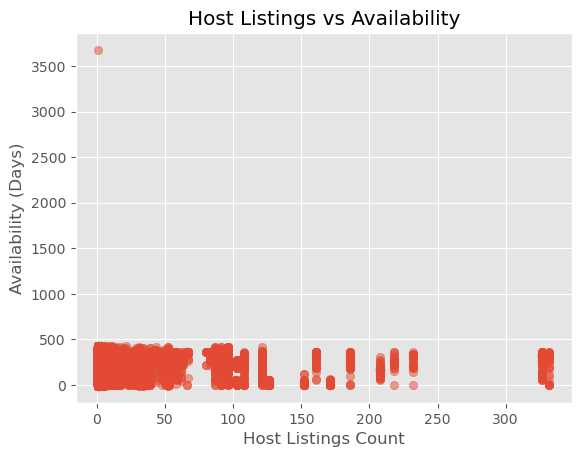

In [15]:
if 'calculated_host_listings_count' in df.columns and 'availability_365' in df.columns:
    plt.scatter(df['calculated_host_listings_count'], df['availability_365'], alpha=0.5)
    plt.xlabel("Host Listings Count")
    plt.ylabel("Availability (Days)")
    plt.title("Host Listings vs Availability")
    plt.savefig(os.path.join(output_folder, "host_vs_availability.png"))
    plt.show()


In [16]:
df.to_csv("Airbnb_Open_Data_Cleaned.csv", index=False)
print("Saved cleaned dataset as Airbnb_Open_Data_Cleaned.csv")


Saved cleaned dataset as Airbnb_Open_Data_Cleaned.csv
